# 머신러닝 (Machine Learning)

## 1. 지도학습 (Supervised Learning)
- 입력(x)을 받아 출력(y)를 예측하는 것으로, 정답이 있는 데이터를 사용하여 학습
- 입력값과 출력값을 가지고 있는 트레이닝셋(학습용 데이터)을 이용하여 모형을 학습하고, 입력값만 있는 데이터에 대한 출력값을 예측하는 것이 목표
- 실제로 모형의 성능을 확인하기 위해, 전체 트레이닝셋에서 일부를 테스트셋(모형 평가를 위한 데이터)으로 빼내어 모형의 성능을 평가
- 지도학습의 종류
    - 분류 (Classification) : 출력이 둘 이상의 그룹인 경우
        - 예) 로지스틱 회귀분석
    - 회귀 (Regression) : 출력이 숫자 값인 경우
        - 예) 회귀분석
    
## 2. 비지도학습 (Unsupervised Learning)
- 지도학습과 달리 정답이 없는 경우
- 데이터들로부터 패턴이나 형태를 찾아야 하는 문제로 지도학습에 비해 어려움
- 대표적으로 클러스터링(Clustering), 차원축소(Dimensionality reduction) 등이 있음

## 모형의 성능 평가
- 트레이닝 에러 : 모형을 학습하는데 사용한 데이터로 계산한 에러
- 테스트 에러 : 테스트셋으로 계산한 에러
- 모형이 복잡해질수록 트레이닝 에러는 점점 낮아지는 반면, 테스트 에러는 모형이 과도하게 복잡해지면 다시 증가하는 경향이 있음. (이를 과적합(Overfitting)이라고 합)
- 모형에 따라 복잡도를 결정하는 변수가 있는데 이를 하이퍼파라미터(Hyperparameter)라 부름
- 따라서 트레이닝 에러보다 테스트 에러를 낮추는 모형이 더 좋은 성능을 가지는 모형이라고 할 수 있음


![](https://blog.kakaocdn.net/dn/sGBYV/btqGkk4FHzX/53KewBxm9nNxdhUjCj4wN1/img.png)

<그림출처: https://needjarvis.tistory.com/569>

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FvSYNy%2FbtqK85bI0qY%2FGtAttpS47bDpkVGB1hX8u0%2Fimg.png" width=400>

<그림출처: The Elements of Statistical Learning: Data Mining, Inference, and Prediction>

# 분류 (Classification) - 지도학습
1. 로지스틱 회귀모형
2. k-Nearest Neighbors (KNN)
3. 서포트 벡터 머신 (Support Vetor Machine (SVM))
4. 의사결정나무 (Decision Tree)
5. 랜덤포레스트 (Random Forest)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 설정
plt.rc('font', family = 'AppleGothic')   # Mac
# plt.rc('font', family = 'Malgun Gothic')   # Windows
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## 예제 데이터 - 붓꽃(Iris) 데이터

In [2]:
# 데이터 불러오기
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X.shape

(150, 2)

### 트레이닝셋과 테스트셋으로 나누기

In [3]:
from sklearn.model_selection import train_test_split

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, X_test.shape

((105, 2), (45, 2))

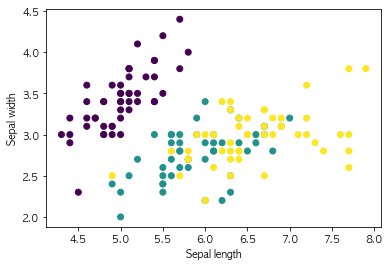

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [5]:
# Decision boundary 함수
import matplotlib as mpl
def plot_decision_regions(X, y, model, title, xlab, ylab):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

## 분류 성능 비교 측도
### 정확도 (Accuracy)
- 테스트셋의 개수 중에 올바르게 예측한 비율

## 1. 로지스틱 회귀모형

In [6]:
from sklearn.linear_model import LogisticRegression

model_logit = LogisticRegression(penalty = "none")
model_logit = model_logit.fit(X_train, y_train)

### Decision boundary

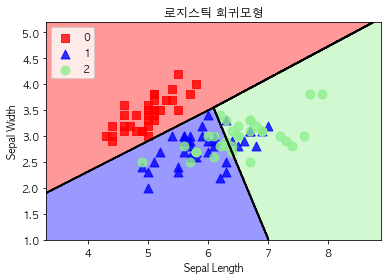

In [7]:
plot_decision_regions(X_train, y_train, model_logit, 
                      "로지스틱 회귀모형", "Sepal Length", "Sepal Width")
plt.show()

### 테스트셋으로 모형 성능 평가

In [8]:
from sklearn.metrics import accuracy_score

y_pred_logit = model_logit.predict(X_test)
acc_logit = accuracy_score(y_test, y_pred_logit)
print("로지스틱 회귀모형 모형 성능: {}".format(round(acc_logit, 3)))

로지스틱 회귀모형 모형 성능: 0.8


## 2. k-Nearest Neighbors (KNN)
- 현 데이터와 가장 가까운 거리에 있는 k개의 데이터를 가지고 분류
- k개의 데이터 중 다수결에 의해 가장 많은 그룹으로 분류

<img src="https://blog.kakaocdn.net/dn/cvzGSE/btqw569xJ8n/DfckialHS6fgKmDZpy4L01/img.png" width=400>

<그림출처: https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-6-K-%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83KNN>

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn = model_knn.fit(X_train, y_train)

### Decision boundary

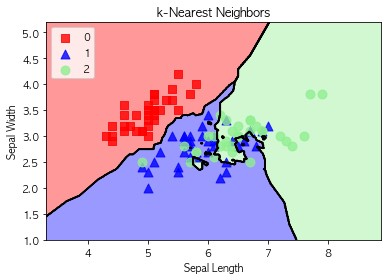

In [10]:
plot_decision_regions(X_train, y_train, model_knn, 
                      "k-Nearest Neighbors", "Sepal Length", "Sepal Width")
plt.show()

### 테스트셋으로 모형 성능 평가

In [11]:
y_pred_knn = model_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN 모형 성능: {}".format(round(acc_knn, 3)))

KNN 모형 성능: 0.844


## 3. 서포트 벡터 머신 (Support vector machine; SVM)
- 아래의 그림과 같이 두 그룹간의 거리(margin)를 가장 크게 하는 분류 규칙을 찾는 방법
- 인공 신경망(Neural Network) 기반의 딥러닝이 발전하기 전까지 가장 좋은 성능을 보여주었던 머신러닝 알고리즘
- 수학적으로 많은 이론이 정립되어 있음


<img src="https://i.imgur.com/DrcoGVQ.png" width=350>

<그림출처: https://ratsgo.github.io/machine%20learning/2017/05/23/SVM/>

### 선형(Linear) SVM

In [12]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')
model_svm = model_svm.fit(X_train, y_train)

### Decision boundary

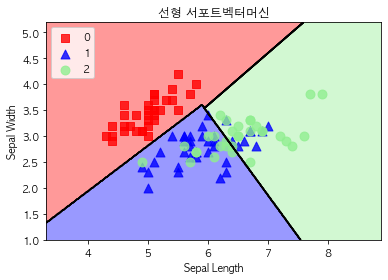

In [13]:
plot_decision_regions(X_train, y_train, model_svm, 
                      "선형 서포트벡터머신", "Sepal Length", "Sepal Width")
plt.show()

### 테스트셋으로 모형 성능 평가

In [14]:
y_pred_svm = model_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("선형 SVM 모형 성능: {}".format(round(acc_svm, 3)))

선형 SVM 모형 성능: 0.778


### 커널(Kernel) SVM
- 비선형(Non-linear) SVM 방법
- 아래와 같은 문제를 XOR 문제라 하는데, 직선으로는 이 문제를 해결할 수 없음
- 커널함수를 통해 데이터의 차원을 늘리고, 고차원 공간에서의 평면으로 구분하게 되면 XOR 문제를 해결할 수 있음
- 커널함수 종류
    - Gaussian kernel (RBF kernel)
    - Polynomial kernel
    - Epanichnikov kernel
    - Sigmoid kernel

<img src="https://datascienceschool.net/_images/13.03%20%EC%BB%A4%EB%84%90%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0_3_0.png" width=400>

<그림출처: https://datascienceschool.net/03%20machine%20learning/13.03%20%EC%BB%A4%EB%84%90%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0.html>

In [15]:
model_svm = SVC(kernel='poly')
model_svm = model_svm.fit(X_train, y_train)

### Decision boundary

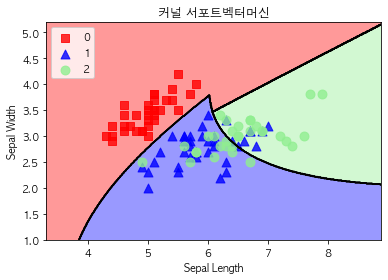

In [16]:
plot_decision_regions(X_train, y_train, model_svm, 
                      "커널 서포트벡터머신", "Sepal Length", "Sepal Width")
plt.show()

### 테스트셋으로 모형 성능 평가

In [17]:
y_pred_svm = model_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("비선형 SVM 모형 성능: {}".format(round(acc_svm, 3)))

비선형 SVM 모형 성능: 0.8


## 4. 의사결정나무 (Decision Tree)
- 여러 독립변수 중 하나의 독립변수를 선택하여 그 변수에 대한 기준값을 정함
- 이 기준값을 기준으로 그룹으로 나누게 됨
- 한 변수에 대해 분류 규칙을 결정하게 되기 때문에 해석이 용이하지만 일반적으로 성능은 그다지 좋지 못함

[Text(132.85714285714286, 209.07692307692307, 'X[0] <= 5.55\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(53.14285714285714, 192.35076923076923, 'X[1] <= 2.8\ngini = 0.352\nsamples = 41\nvalue = [32, 8, 1]'),
 Text(31.885714285714286, 175.62461538461537, 'X[0] <= 4.95\ngini = 0.219\nsamples = 8\nvalue = [0, 7, 1]'),
 Text(21.257142857142856, 158.89846153846153, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(10.628571428571428, 142.1723076923077, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(31.885714285714286, 142.1723076923077, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(42.51428571428571, 158.89846153846153, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(74.39999999999999, 175.62461538461537, 'X[0] <= 5.35\ngini = 0.059\nsamples = 33\nvalue = [32, 1, 0]'),
 Text(63.77142857142857, 158.89846153846153, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]'),
 Text(85.02857142857142, 158.89846153846153, 'X[1] <= 3.25\ngini = 0.32\nsamples 

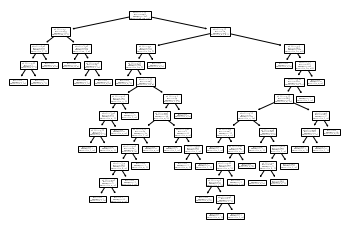

In [18]:
from sklearn import tree

model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(X_train, y_train)
tree.plot_tree(model_tree) 

### Decision boundary

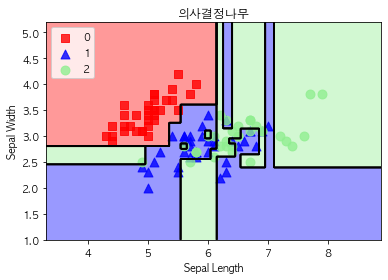

In [19]:
plot_decision_regions(X_train, y_train, model_tree, 
                      "의사결정나무", "Sepal Length", "Sepal Width")
plt.show()

### 테스트셋으로 모형 성능 평가

In [20]:
y_pred_tree = model_tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("의사결정나무 모형 성능: {}".format(round(acc_tree, 3)))

의사결정나무 모형 성능: 0.733


### 가지치기 (Pruning)
- `max_depth`로 최대 깊이 설정

[Text(167.4, 190.26, 'X[0] <= 5.55\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(83.7, 135.9, 'X[1] <= 2.8\ngini = 0.352\nsamples = 41\nvalue = [32, 8, 1]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 4.95\ngini = 0.219\nsamples = 8\nvalue = [0, 7, 1]'),
 Text(20.925, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 5.35\ngini = 0.059\nsamples = 33\nvalue = [32, 1, 0]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 6.15\ngini = 0.53\nsamples = 64\nvalue = [2, 31, 31]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 3.6\ngini = 0.472\nsamples = 28\nvalue = [2, 19, 7]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.393\nsamples = 26\nvalue = [0, 

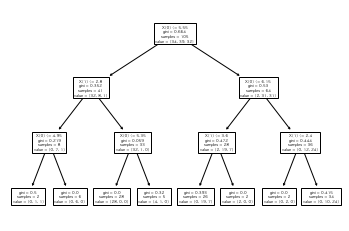

In [21]:
model_tree = tree.DecisionTreeClassifier(max_depth=3)
model_tree = model_tree.fit(X_train, y_train)
tree.plot_tree(model_tree) 

### Decision boundary

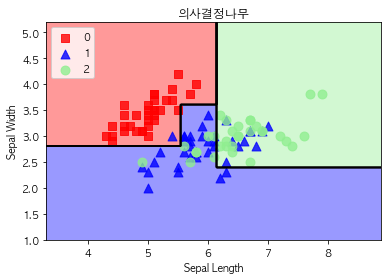

In [22]:
plot_decision_regions(X_train, y_train, model_tree, 
                      "의사결정나무", "Sepal Length", "Sepal Width")
plt.show()

### 테스트셋으로 모형 성능 평가

In [23]:
y_pred_tree = model_tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("가지치기 후의 의사결정나무 모형 성능: {}".format(round(acc_tree, 3)))

가지치기 후의 의사결정나무 모형 성능: 0.822


## 5. 랜덤포레스트 (Random Forest)
- 의사결정나무 모형의 낮은 성능을 보완하기 위한 모형
- 의사결정나무 여러 개를 종합하여 예측을 하는 대표적인 앙상블(ensemble) 모형
- 트리 모형 개수만큼의 예측값을 다수결을 통해 하나의 에측값으로 결정

<img src="https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/639f3ed1831071861fe4dd81653fa064dec27864/8-Figure2-1.png" width=400>

<그림출처: https://yeo0.github.io/data/2018/11/06/6.-%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8/>

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=10)
model_rf = model_rf.fit(X_train, y_train)

### Decision boundary

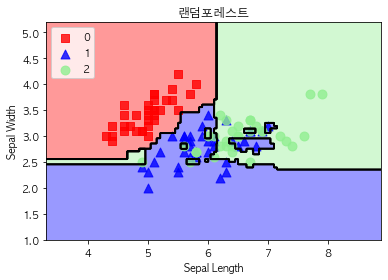

In [31]:
plot_decision_regions(X_train, y_train, model_rf, 
                      "랜덤포레스트", "Sepal Length", "Sepal Width")
plt.show()

### 테스트셋으로 모형 성능 평가

In [32]:
y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("랜덤포레스트 모형 성능: {}".format(round(acc_rf, 3)))

랜덤포레스트 모형 성능: 0.8
